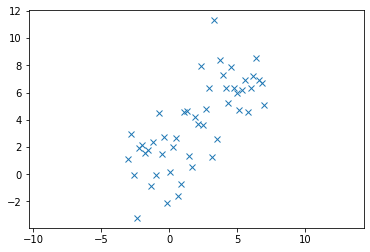

In [20]:
# Custom PCA
import numpy as np
import matplotlib.pyplot as plt
import pickle
from numpy import linalg

with open('eigen.pkl', 'rb') as f:
    X = pickle.load(f)
    
plt.plot(X[:,0], X[:,1], 'x' )
plt.axis ('equal')
plt.show()

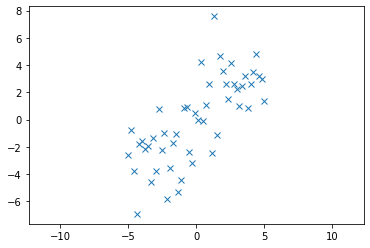

In [21]:
mean_val=X.mean(axis=0)
N=X.shape[0]
X_centered=X.copy()-mean_val

plt.plot(X_centered[:,0], X_centered[:,1], 'x')
plt.axis('equal')
plt.show()

In [22]:
X_cov=X_centered.T.dot(X_centered)/(N-1) # covariance matrix
print(f"covariance matrix:\n{X_cov}\n")
X_cov_np=np.cov(X_centered, rowvar=0)
print(f"numpy covariance matrix:\n{X_cov_np}\n")

covariance matrix:
[[8.85047897 6.81117445]
 [6.81117445 9.95969352]]

numpy covariance matrix:
[[8.85047897 6.81117445]
 [6.81117445 9.95969352]]



In [27]:
eigenvalues, eigenvectors=linalg.eig(X_cov)

print('\n'.join(
    f"lambda {eig_id} = {eigenvalues[eig_id]}, w = {eigenvectors[:,eig_id]}"
    for eig_id in range(eigenvalues.size)
))


lambda 0 = 2.571369350737129, w = [-0.7352406   0.67780621]
lambda 1 = 16.238803136510406, w = [-0.67780621 -0.7352406 ]


(-5.5, 5.5, -7.662694884563432, 8.312192114382853)

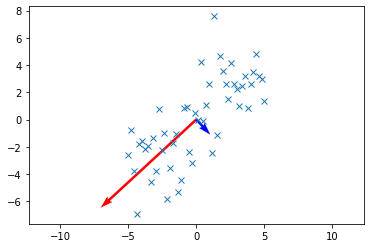

In [44]:
origin=X_centered.mean(axis=0)
plt.quiver(eigenvectors[0][0], eigenvectors[0][1], color='r', scale=eigenvalues[0])
plt.quiver(eigenvectors[1][0], eigenvectors[1][1], color='b', scale=eigenvalues[1])   
plt.plot(X_centered[:,0], X_centered[:,1], 'x')
plt.axis('equal')

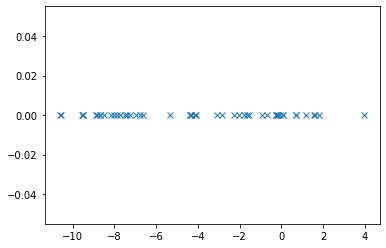

In [47]:
max_eigenval=np.argmax(eigenvalues)
max_eigenvec=eigenvectors[:, max_eigenval].reshape(-1,1)
X_redused=X.dot(max_eigenvec)
plt.plot(X_redused, np.zeros(N), 'x')

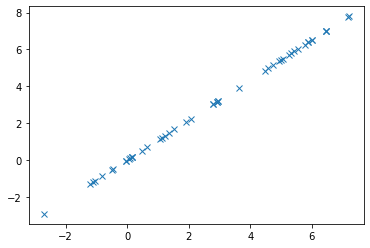

In [48]:
X_inverse = X_redused.dot(max_eigenvec.reshape(1,-1))
plt.plot(X_inverse[:,0], X_inverse[:,1], 'x')
plt.show()